In [ ]:
import numpy as np
import pandas as pd

In [ ]:

!pip install biovec ifeature tensorflow keras seaborn matplotlib


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 92.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for biovec: filename=biovec-0.2.7-py3-none-any.whl size=3442 sha256=ad898b84d091f22fb76cdf05d43025c8f0b23d42501363882f8e449d278d674f
  Stored in directory: /root/.cache/pip/wheels/3f/91/84/5e25991b711816262c5c8f67238bb18da55b93744971c410cb
  Created wheel for gensim: filename=gensim-3.4.0-cp311-cp311-linux_x86_64.whl size=22293585 sha256=054d7e5e901caefafc1e54f7839a520ac6656368026620c7a8e844ffaec6d54c
  Stored in directory: /root/.cache/pip/wheels/82/41/40/b95d8edf0f93f4afaa6e8863822fdf8c4fb8082ece4c44ac05
  Created wheel for pyfasta: filename=pyfasta-0.5.2-py3-none-any.whl size=14274 sha256=9fac5c34293685278a0551ccbdaac27224b766652d34ff2c4644550703aff79b
  Stored in directory: /root/.cache/pip/wheels/81/8f/3d/40f56b0c512fc87d84288e300cebb27493d91d6888293d5145
Successfu

In [ ]:
import os


data_path = ''
files = ['AIDS', 'proto_oncogene', 'tumor_suppressor']

sequences = []


for file in files:
    with open(os.path.join(data_path, file), 'r') as f:

        sequence = ""
        for line in f:

            if line.startswith(">"):
                if sequence:
                    sequences.append(sequence)
                sequence = ""
            else:
                sequence += line.strip()
        if sequence:
            sequences.append(sequence)


print(sequences[:5])


['MDDSMDYPDRDGDDLDQFQGTARSQVVQNQPHDEEVNLSESESFAGADEPPAAPRDASLIESHDMDEGPAAPARTLSPTGYEAGKHAPGGIANSDEAPPGAYNAQEYKHLNVGEDVRELFSYIGRYKPQTVELDTRIKPFIPDYIPAVGGIDEFIKVPRPDTKPDYLGLKVLDEPAAKQSDPTVLTLQLRQLSKEAPGAKADMVGRLEHTDENKAKKIQQWIASINDIHKAKPAATVNYSKRMPEIEALMQEWPPEVETFLKTMHMPSGDVELDIKTYARLVCTLLDIPVYDDPVESLHVLFTLYLEFKNNPIFRQHMEMENKLDGMSGGGGGMMGGGADVLGL', 'MGGLEPCSRLLLLPLLLAVGGLRPVQAQAQSDCSCSTVSPGVLAGIVMGDLVLTVLIALAVYFLGRLVHRGRGAAEAATRKQRITETESPYQELQGQRSDVYSDLNMQRPYYK', 'MSQYQQGYGDQTRRVDEYGNPLTSQGQVDQYGNPISGGGMTGATGHGHGHHQQHHGVGVDQTTGFGSNTGTGTGYGTHTGSGGTHTGGVGGYGTTTEYGSTNTGSGYGNTDIGGTGYGTGTGTGTTGYGATGGGTGVGYGGTGHDNRGVMDKIKEKIPGTDQNASTYGTGTGYGTTGIGHQQHGGDNRGVMDKIKEKIPGTDQNQYTHGTGTGTGTGYGTTGYGASGVGHQQHGEKGVMDKIKEKIPGTEQNTYGTGTGTGHGTTGYGSTGTGHGTTGYGDEQHHGEKKGIMEKIKEKLPGTGSCTGHGQGH', 'MSLLNCENSCGSSQSESDCCVAMASSCSAATKDDSVGGTASTGNLSSSFMEEIQGYDVEFDPPLESKYECPICLMALREAVQTPCGHRFCKACIIKSIRDAGHKCPVDNEILLENQLFPDNFAKREILSLMVKCPNEGCLHKMELRHLEDHQAHCEFALVDCPQCQRPFQKFHINIHILKDCPRRQVSCDNCAALVAFEDKEIHDQNCPLANVICEY

In [ ]:
import os


data_path = ''
files = ['AIDS', 'proto_oncogene', 'tumor_suppressor']

sequences = []


for file in files:
    with open(os.path.join(data_path, file), 'r') as f:

        sequence = ""
        for line in f:

            if line.startswith(">"):
                if sequence:
                    sequences.append(sequence)
                sequence = ""
            else:
                sequence += line.strip()
        if sequence:
            sequences.append(sequence)


print(sequences[:5])


['MDDSMDYPDRDGDDLDQFQGTARSQVVQNQPHDEEVNLSESESFAGADEPPAAPRDASLIESHDMDEGPAAPARTLSPTGYEAGKHAPGGIANSDEAPPGAYNAQEYKHLNVGEDVRELFSYIGRYKPQTVELDTRIKPFIPDYIPAVGGIDEFIKVPRPDTKPDYLGLKVLDEPAAKQSDPTVLTLQLRQLSKEAPGAKADMVGRLEHTDENKAKKIQQWIASINDIHKAKPAATVNYSKRMPEIEALMQEWPPEVETFLKTMHMPSGDVELDIKTYARLVCTLLDIPVYDDPVESLHVLFTLYLEFKNNPIFRQHMEMENKLDGMSGGGGGMMGGGADVLGL', 'MGGLEPCSRLLLLPLLLAVGGLRPVQAQAQSDCSCSTVSPGVLAGIVMGDLVLTVLIALAVYFLGRLVHRGRGAAEAATRKQRITETESPYQELQGQRSDVYSDLNMQRPYYK', 'MSQYQQGYGDQTRRVDEYGNPLTSQGQVDQYGNPISGGGMTGATGHGHGHHQQHHGVGVDQTTGFGSNTGTGTGYGTHTGSGGTHTGGVGGYGTTTEYGSTNTGSGYGNTDIGGTGYGTGTGTGTTGYGATGGGTGVGYGGTGHDNRGVMDKIKEKIPGTDQNASTYGTGTGYGTTGIGHQQHGGDNRGVMDKIKEKIPGTDQNQYTHGTGTGTGTGYGTTGYGASGVGHQQHGEKGVMDKIKEKIPGTEQNTYGTGTGTGHGTTGYGSTGTGHGTTGYGDEQHHGEKKGIMEKIKEKLPGTGSCTGHGQGH', 'MSLLNCENSCGSSQSESDCCVAMASSCSAATKDDSVGGTASTGNLSSSFMEEIQGYDVEFDPPLESKYECPICLMALREAVQTPCGHRFCKACIIKSIRDAGHKCPVDNEILLENQLFPDNFAKREILSLMVKCPNEGCLHKMELRHLEDHQAHCEFALVDCPQCQRPFQKFHINIHILKDCPRRQVSCDNCAALVAFEDKEIHDQNCPLANVICEY

Loading sequences...
Original DataFrame head:
                                            Sequence Label  Length
0  MDDSMDYPDRDGDDLDQFQGTARSQVVQNQPHDEEVNLSESESFAG...  AIDS     344
1  MGGLEPCSRLLLLPLLLAVGGLRPVQAQAQSDCSCSTVSPGVLAGI...  AIDS     113
2  MSQYQQGYGDQTRRVDEYGNPLTSQGQVDQYGNPISGGGMTGATGH...  AIDS     312
3  MSLLNCENSCGSSQSESDCCVAMASSCSAATKDDSVGGTASTGNLS...  AIDS     522
4  MSLLNCENSCGSSQSESDCCVAMASSCSAATKDDSVGGTASTGNLS...  AIDS     522

Total sequences loaded: 3879
Label distribution:
Label
Tumor Suppressor    1719
AIDS                1282
Proto-oncogene       878
Name: count, dtype: int64


<ipython-input-11-8d6669b8ad8d>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y='Length', data=df, palette='muted')


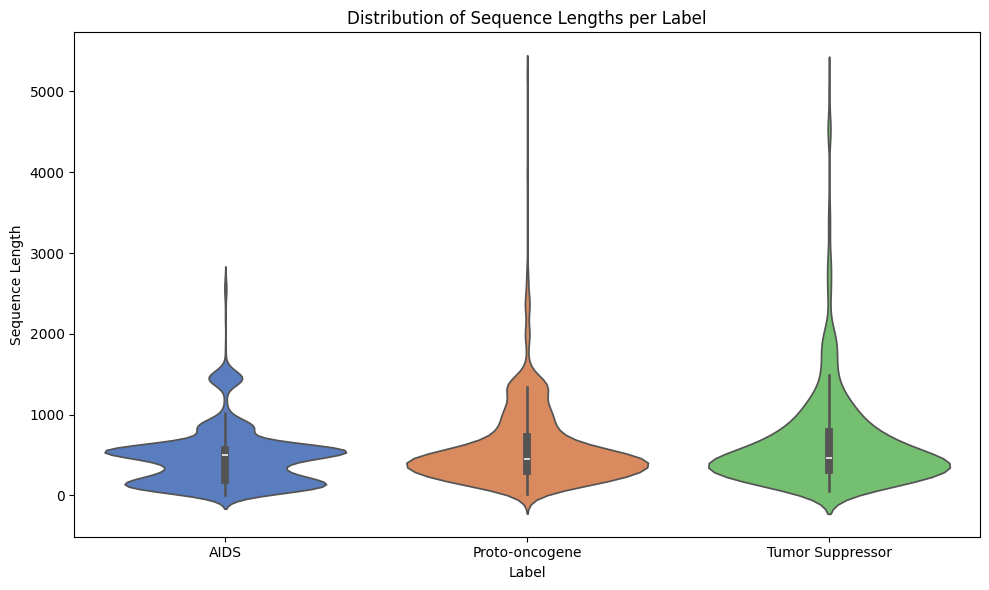

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO

# Define file paths
file_paths = {
    'AIDS': './AIDS',
    'Proto-oncogene': './proto_oncogene',
    'Tumor Suppressor': './tumor_suppressor'
}

# Initialize lists
sequences = []
labels = []

# Load sequences
print("Loading sequences...")
for label, path in file_paths.items():
    try:
        for record in SeqIO.parse(path, 'fasta'):
            sequences.append(str(record.seq))
            labels.append(label)
    except FileNotFoundError:
        print(f"Warning: File not found at {path}. Skipping.")
    except Exception as e:
        print(f"Error reading {path}: {e}")

# Create DataFrame
if not sequences:
    raise ValueError("No sequences were loaded. Check file paths and formats.")

df = pd.DataFrame({'Sequence': sequences, 'Label': labels})

# Add sequence length column
df['Length'] = df['Sequence'].apply(len)

# Print basic info
print("Original DataFrame head:")
print(df.head())
print(f"\nTotal sequences loaded: {len(df)}")
print(f"Label distribution:\n{df['Label'].value_counts()}")

# Plot violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Label', y='Length', data=df, palette='muted')
plt.title("Distribution of Sequence Lengths per Label")
plt.ylabel("Sequence Length")
plt.xlabel("Label")
plt.tight_layout()
plt.show()


In [ ]:
print("Class Distribution:")
print(df['Label'].value_counts())


Class Distribution:
Label
Tumor Suppressor    1719
AIDS                1282
Proto-oncogene       878
Name: count, dtype: int64


<ipython-input-13-1b1732a52a82>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='pastel')


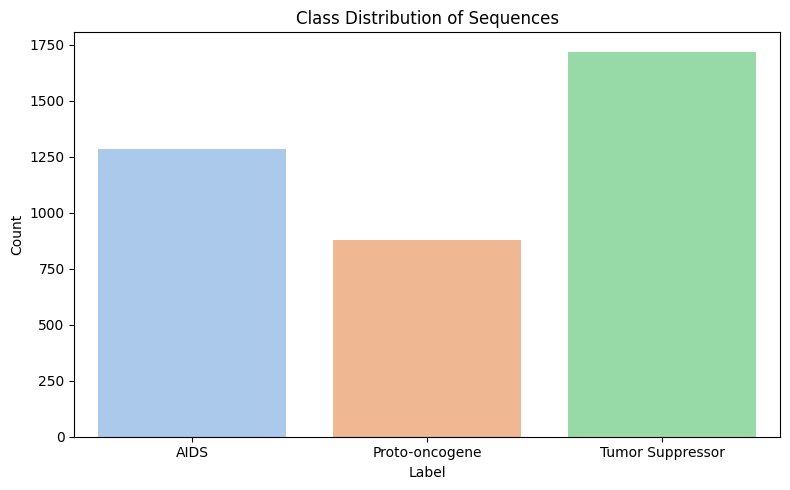

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Label', data=df, palette='pastel')
plt.title("Class Distribution of Sequences")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


<ipython-input-14-0fcd5b459210>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Label', y='GC_Content', data=df, palette='pastel')


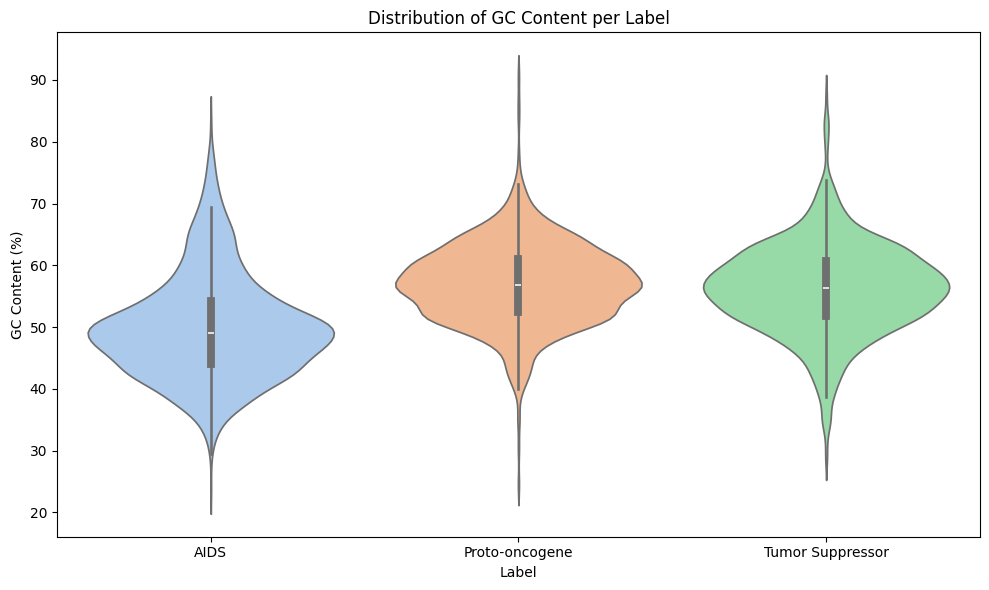

In [ ]:
from Bio.SeqUtils import gc_fraction

# Calculate GC content (as percentage)
df['GC_Content'] = df['Sequence'].apply(lambda seq: gc_fraction(seq) * 100)

# Plot GC content distribution as violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Label', y='GC_Content', data=df, palette='pastel')
plt.title("Distribution of GC Content per Label")
plt.ylabel("GC Content (%)")
plt.xlabel("Label")
plt.tight_layout()
plt.show()


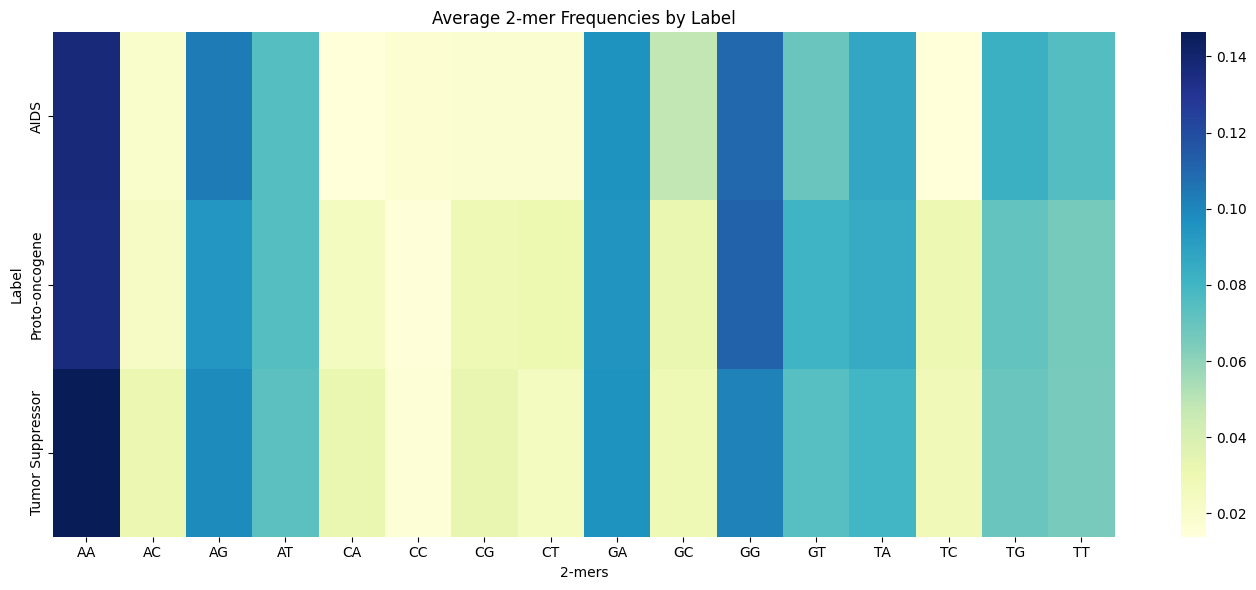

In [ ]:
from collections import Counter
import numpy as np

# Define all possible 2-mers
from itertools import product
k = 2
kmers = [''.join(p) for p in product('ACGT', repeat=k)]

# Function to count 2-mers in a sequence
def get_kmer_freq(seq, k=2):
    seq = seq.upper()
    counts = Counter([seq[i:i+k] for i in range(len(seq) - k + 1) if set(seq[i:i+k]) <= {'A', 'C', 'G', 'T'}])
    total = sum(counts.values())
    freq = {kmer: counts.get(kmer, 0) / total if total > 0 else 0 for kmer in kmers}
    return freq

# Calculate k-mer frequencies for all sequences
kmer_freqs = df['Sequence'].apply(get_kmer_freq)
kmer_df = pd.DataFrame(kmer_freqs.tolist())
kmer_df['Label'] = df['Label']

# Group by label and compute mean frequency per k-mer
kmer_means = kmer_df.groupby('Label').mean()

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(kmer_means, annot=False, cmap='YlGnBu', xticklabels=True, yticklabels=True)
plt.title(f"Average {k}-mer Frequencies by Label")
plt.xlabel(f"{k}-mers")
plt.ylabel("Label")
plt.tight_layout()
plt.show()


In [ ]:
  !pip install Bio ifeature

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/Superzchen/iFeature

Cloning into 'iFeature'...
remote: Enumerating objects: 322, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 322 (delta 40), reused 33 (delta 29), pack-reused 275 (from 1)
Receiving objects: 100% (322/322), 6.72 MiB | 11.53 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [ ]:
import pandas as pd
from Bio import SeqIO
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout, Flatten, Activation, RepeatVector, Permute, Multiply, Lambda
import tensorflow as tf
import os
# Define file paths
file_paths = {
    'AIDS': './AIDS',
    'Proto-oncogene': './proto_oncogene',
    'Tumor Suppressor': './tumor_suppressor'
}

# Initialize lists to store sequences and labels
sequences = []
labels = []

# Load sequences and assign labels
print("Loading sequences...")
for label, path in file_paths.items():
    try:
        for record in SeqIO.parse(path, 'fasta'):
            sequences.append(str(record.seq))
            labels.append(label)
    except FileNotFoundError:
        print(f"Warning: File not found at {path}. Skipping.")
    except Exception as e:
        print(f"Error reading {path}: {e}")

if not sequences:
    raise ValueError("No sequences were loaded. Check file paths and formats.")

# Create a DataFrame
df = pd.DataFrame({'Sequence': sequences, 'Label': labels})
print("Original DataFrame head:")
print(df.head())
print(f"\nTotal sequences loaded: {len(df)}")
print(f"Label distribution:\n{df['Label'].value_counts()}")


ifeature_dir = './iFeature'
os.makedirs(ifeature_dir, exist_ok=True)

# Define paths relative to the working directory
fasta_output_path = './sequences.fasta'
ifeature_fasta_path = os.path.join(ifeature_dir, 'sequences.fasta')
feature_output_path = os.path.join(ifeature_dir, 'AAC_features.csv')


print(f"\nSaving sequences to {fasta_output_path}...")
with open(fasta_output_path, 'w') as f:
    for i, seq in enumerate(df['Sequence']):

        f.write(f'>Sequence_{i}\n{seq}\n')



Loading sequences...
Original DataFrame head:
                                            Sequence Label
0  MDDSMDYPDRDGDDLDQFQGTARSQVVQNQPHDEEVNLSESESFAG...  AIDS
1  MGGLEPCSRLLLLPLLLAVGGLRPVQAQAQSDCSCSTVSPGVLAGI...  AIDS
2  MSQYQQGYGDQTRRVDEYGNPLTSQGQVDQYGNPISGGGMTGATGH...  AIDS
3  MSLLNCENSCGSSQSESDCCVAMASSCSAATKDDSVGGTASTGNLS...  AIDS
4  MSLLNCENSCGSSQSESDCCVAMASSCSAATKDDSVGGTASTGNLS...  AIDS

Total sequences loaded: 3879
Label distribution:
Label
Tumor Suppressor    1719
AIDS                1282
Proto-oncogene       878
Name: count, dtype: int64

Saving sequences to ./sequences.fasta...


In [ ]:

!python iFeature/iFeature.py --file iFeature/sequences.fasta --type AAC --out iFeature/AAC_features.csv


usage: it's usage tip.
iFeature.py: error: argument --type: invalid choice: 'AAC,DPC,CTD' (choose from 'AAC', 'EAAC', 'CKSAAP', 'DPC', 'DDE', 'TPC', 'BINARY', 'GAAC', 'EGAAC', 'CKSAAGP', 'GDPC', 'GTPC', 'AAINDEX', 'ZSCALE', 'BLOSUM62', 'NMBroto', 'Moran', 'Geary', 'CTDC', 'CTDT', 'CTDD', 'CTriad', 'KSCTriad', 'SOCNumber', 'QSOrder', 'PAAC', 'APAAC', 'KNNprotein', 'KNNpeptide', 'PSSM', 'SSEC', 'SSEB', 'Disorder', 'DisorderC', 'DisorderB', 'ASA', 'TA')


In [ ]:
feature_output_path = os.path.join(ifeature_dir, 'AAC_features.csv')

In [ ]:
print(f"\nLoading features from {feature_output_path}...")


Loading features from ./iFeature/AAC_features.csv...


In [ ]:
try:

    features = pd.read_csv(feature_output_path, sep='\t')
    print("Raw features head:")
    print(features.head())
    identifier_col = features.columns[0]
    print(f"Dropping identifier column: '{identifier_col}'")
    features = features.drop(columns=[identifier_col])

    # Check if the number of rows matches the original dataframe
    if len(features) != len(df):
         raise ValueError(f"Mismatch in number of sequences ({len(df)}) and features ({len(features)}). Check iFeature output.")


    features['Label'] = df['Label'].values
    print("\nFeatures DataFrame with Labels head:")
    print(features.head())

except FileNotFoundError:
    raise FileNotFoundError(f"Feature file not found at {feature_output_path}. Did iFeature run correctly?")
except Exception as e:
    print(f"Error loading or processing features: {e}")
    raise e

Raw features head:
            #         A         C         D         E         F         G  \
0  Sequence_0  0.084302  0.002907  0.093023  0.081395  0.026163  0.078488   
1  Sequence_1  0.088496  0.026549  0.035398  0.044248  0.008850  0.097345   
2  Sequence_2  0.012821  0.003205  0.041667  0.035256  0.003205  0.298077   
3  Sequence_3  0.055556  0.057471  0.051724  0.076628  0.042146  0.045977   
4  Sequence_4  0.055556  0.057471  0.053640  0.074713  0.042146  0.045977   

          H         I         K  ...         M         N         P         Q  \
0  0.026163  0.046512  0.058140  ...  0.037791  0.031977  0.084302  0.040698   
1  0.008850  0.026549  0.017699  ...  0.026549  0.008850  0.053097  0.070796   
2  0.064103  0.035256  0.048077  ...  0.019231  0.032051  0.019231  0.064103   
3  0.045977  0.057471  0.044061  ...  0.032567  0.040230  0.053640  0.061303   
4  0.045977  0.057471  0.044061  ...  0.032567  0.040230  0.053640  0.061303   

          R         S         T      

In [ ]:
X = features.drop('Label', axis=1)
y = features['Label']


print(f"\nShape of features (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")



Shape of features (X): (3879, 20)
Shape of labels (y): (3879,)

Training set size: 3103
Testing set size: 776


In [ ]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [ ]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
print(f"\nLabel mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
num_classes = len(le.classes_)
print(f"Number of classes: {num_classes}")


Label mapping: {'AIDS': np.int64(0), 'Proto-oncogene': np.int64(1), 'Tumor Suppressor': np.int64(2)}
Number of classes: 3


In [ ]:
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
input_shape = (X_train_reshaped.shape[1], 1)
print(f"\nReshaped input data shape: {X_train_reshaped.shape}")


Reshaped input data shape: (3103, 20, 1)


In [ ]:
# --- Model Definition ---
print("\nDefining the model...")

input_layer = Input(shape=input_shape)

# 1D Convolution layer
conv1 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
max_pool = MaxPooling1D(pool_size=2)(conv1)

bi_lstm = Bidirectional(LSTM(64, return_sequences=True))(max_pool)

attention_dense = Dense(1, activation='tanh')(bi_lstm)
attention_flatten = Flatten()(attention_dense)
attention_weights = Activation('softmax')(attention_flatten)


dense_1 = Dense(1)(bi_lstm)
flatten = Flatten()(dense_1)
activation = Activation('sigmoid')(flatten)


steps_after_pool = bi_lstm.shape[1]


repeat_vector = RepeatVector(bi_lstm.shape[2])(activation)
permute = Permute((2, 1))(repeat_vector)


multiply = Multiply()([bi_lstm, permute])

# Lambda layer to take the last step's output after multiplication
lambda_layer = Lambda(lambda x: x[:, -1, :])(multiply) # Take features from the last time step: (batch, 128)

# Final dense layers for classification
dense_2 = Dense(64, activation='relu')(lambda_layer) # Added relu activation
dropout_1 = Dropout(0.5)(dense_2)
output = Dense(num_classes, activation='softmax')(dropout_1) # Use num_classes

# Create the model
model = Model(inputs=input_layer, outputs=output)

model.summary() # Print model architecture


Defining the model...


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 20, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 20, 64)    │        256 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 10, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 10, 128)   │     66,048 │ max_pooling1d_2[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 10, 1)     │        129 │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 10)        │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_5        │ (None, 10)        │          0 │ flatten_5[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_2     │ (None, 128, 10)   │          0 │ activation_5[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_2 (Permute) │ (None, 10, 128)   │          0 │ repeat_vector_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 10, 128)   │          0 │ bidirectional_2[… │
│ (Multiply)          │                   │            │ permute_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_2 (Lambda)   │ (None, 128)       │          0 │ multiply_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      8,256 │ lambda_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 3)         │        195 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 74,884 (292.52 KB)

 Trainable params: 74,884 (292.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# --- Model Compilation and Training ---
print("\nCompiling the model...")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Compiling the model...


In [ ]:
print(df[df['Label'] == 'Proto-oncogene'].head())


                                               Sequence           Label
1282  MPPRPSSGELWGIHLMPPRILVECLLPNGMIVTLECLREATLVTIK...  Proto-oncogene
1283  MGCVQCKDKEATKLTEERDGSLNQSSGYRYGTDPTPQHYPSFGVTS...  Proto-oncogene
1284  MKAPAVLVPGILVLLFTLVQRSNGECKEALAKSEMNVNMKYQLPNF...  Proto-oncogene
1285  MKAPAVLAPGILVLLFTLVQKSYGECREALVKSEMNVNMKYQLPNF...  Proto-oncogene
1286  MKAPAALAPGILVLLLTLVQKGGGECREALAKSEMNVNMRYRLPNF...  Proto-oncogene


In [ ]:
print(label_encoder.classes_)  # Order of classes


['AIDS' 'Proto-oncogene' 'Tumor Suppressor']


In [ ]:
print("Training the model...")
history = model.fit(
    X_train_reshaped, y_train_encoded,
    validation_data=(X_test_reshaped, y_test_encoded),
    epochs=50, # Consider adding EarlyStopping callback
    batch_size=32,
    verbose=1 # Show progress
)

Training the model...
Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.4400 - loss: 1.0789 - val_accuracy: 0.4433 - val_loss: 1.0632
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.4446 - loss: 1.0664 - val_accuracy: 0.4433 - val_loss: 1.0645
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4498 - loss: 1.0647 - val_accuracy: 0.4433 - val_loss: 1.0651
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4391 - loss: 1.0669 - val_accuracy: 0.4433 - val_loss: 1.0621
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4502 - loss: 1.0580 - val_accuracy: 0.4433 - val_loss: 1.0611
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4418 - loss: 1.0619 - val_accuracy: 0.4459 - val_loss: 1.0449
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.4729 - loss: 1.0352 - val_accuracy: 0.5644 - val_loss: 0.9835
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5415 - loss: 0.9799 - va

In [ ]:
# --- Model Evaluation ---
print("\nEvaluating the model...")
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Evaluating the model...

Test Loss: 0.7671
Test Accuracy: 0.6418


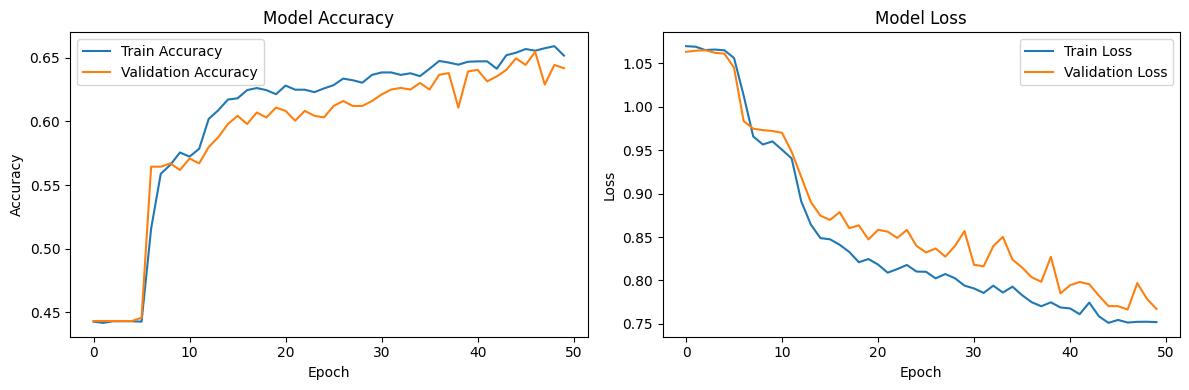

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(df['Label'])


LabelEncoder()


Defining the model (using the same architecture)...


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 20, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 20, 64)    │        256 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 10, 64)    │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 10, 128)   │     66,048 │ max_pooling1d_3[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 10, 1)     │        129 │ bidirectional_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 10)        │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_6        │ (None, 10)        │          0 │ flatten_6[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_3     │ (None, 128, 10)   │          0 │ activation_6[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_3 (Permute) │ (None, 10, 128)   │          0 │ repeat_vector_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_3          │ (None, 10, 128)   │          0 │ bidirectional_3[… │
│ (Multiply)          │                   │            │ permute_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_3 (Lambda)   │ (None, 128)       │          0 │ multiply_3[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      8,256 │ lambda_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 3)         │        195 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 74,884 (292.52 KB)

 Trainable params: 74,884 (292.52 KB)

 Non-trainable params: 0 (0.00 B)


Compiling the model...
Training the model with combined features...
Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.4103 - loss: 1.0814 - val_accuracy: 0.4433 - val_loss: 1.0636
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4535 - loss: 1.0663 - val_accuracy: 0.4433 - val_loss: 1.0627
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4444 - loss: 1.0711 - val_accuracy: 0.4433 - val_loss: 1.0626
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.4494 - loss: 1.0671 - val_accuracy: 0.4433 - val_loss: 1.0644
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4413 - loss: 1.0672 - val_accuracy: 0.4433 - val_loss: 1.0621
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4516 - loss: 1.0578 - val_accuracy: 0.4433 - val_loss: 1.0596
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.4360 - loss: 1.0638 - val_accuracy: 0.4562 - val_loss: 1.0342
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 

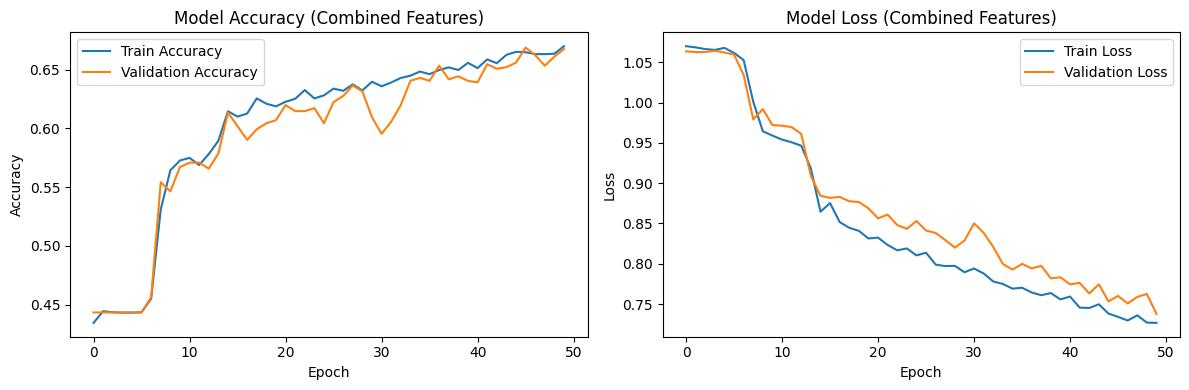

In [ ]:
print("\nDefining the model (using the same architecture)...")

input_layer = Input(shape=input_shape) # Input shape is now wider

# --- Re-define the model layers ---
conv1 = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
max_pool = MaxPooling1D(pool_size=2)(conv1)
bi_lstm = Bidirectional(LSTM(64, return_sequences=True))(max_pool)
dense_1 = Dense(1)(bi_lstm)
flatten = Flatten()(dense_1)
activation = Activation('sigmoid')(flatten)
repeat_vector = RepeatVector(bi_lstm.shape[2])(activation)
permute = Permute((2, 1))(repeat_vector)
multiply = Multiply()([bi_lstm, permute])
lambda_layer = Lambda(lambda x: x[:, -1, :])(multiply)
dense_2 = Dense(64, activation='relu')(lambda_layer)
dropout_1 = Dropout(0.5)(dense_2)
output = Dense(num_classes, activation='softmax')(dropout_1)

model = Model(inputs=input_layer, outputs=output)
model.summary()

# --- Model Compilation and Training ---
print("\nCompiling the model...")
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Training the model with combined features...")
history = model.fit(
    X_train_reshaped, y_train_encoded,
    validation_data=(X_test_reshaped, y_test_encoded),
    epochs=50, # Consider reducing epochs or using EarlyStopping if overfitting occurs faster
    batch_size=32,
    verbose=1
)

# --- Model Evaluation ---
print("\nEvaluating the model with combined features...")
loss, accuracy = model.evaluate(X_test_reshaped, y_test_encoded, verbose=0)
print(f"\nTest Loss (Combined Features): {loss:.4f}")
print(f"Test Accuracy (Combined Features): {accuracy:.4f}")

# Optional: Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Combined Features)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (Combined Features)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import os

feature_types = ['AAC', 'DPC', 'CTDC']
ifeature_dir = 'iFeature'
input_fasta = os.path.join(ifeature_dir, 'sequences.fasta')
feature_files = {}

print("\nRunning iFeature for selected types...")

for ftype in feature_types:
    output_filename = f"{ftype}_features.csv"
    output_path = os.path.join(ifeature_dir, output_filename)
    feature_files[ftype] = output_path

    print(f"  Generating {ftype} features...")
    !python iFeature/iFeature.py --file {input_fasta} --type {ftype} --out {output_path}

    if not os.path.exists(output_path):
        print(f"❌ Warning: {output_path} was not created.")
    else:
        print(f"✅ {ftype} features generated at {output_path}")



Running iFeature for selected types...
  Generating AAC features...
Descriptor type: AAC
✅ AAC features generated at iFeature/AAC_features.csv
  Generating DPC features...
Descriptor type: DPC
✅ DPC features generated at iFeature/DPC_features.csv
  Generating CTDC features...
Descriptor type: CTDC
✅ CTDC features generated at iFeature/CTDC_features.csv


In [ ]:
all_features_list = []
print("\nLoading and combining features...")
for ftype in feature_types:
    feature_path = feature_files.get(ftype)
    if feature_path and os.path.exists(feature_path):
        print(f"  Loading {ftype}...")
        try:
            temp_features = pd.read_csv(feature_path, sep='\t')
            identifier_col = temp_features.columns[0]
            temp_features = temp_features.drop(columns=[identifier_col])
            all_features_list.append(temp_features)
        except Exception as e:
            print(f"Error loading {ftype}: {e}")
    else:
        print(f"Skipping {ftype} file not found: {feature_path}")
if not all_features_list:
     raise ValueError("No feature files loaded.")
features = pd.concat(all_features_list, axis=1)
features['Label'] = df['Label'].values
print(f"\nShape of combined features: {features.shape}")


Loading and combining features...
  Loading AAC...
  Loading DPC...
  Loading CTDC...

Shape of combined features: (3879, 460)


In [ ]:
# --- (Data Splitting - Same as before) ---
X = features.drop('Label', axis=1)
y = features['Label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTraining set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")


Training set size: 3103, Testing set size: 776


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
  # --- Feature Scaling (Applied before reshaping) ---
print("\nScaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns).astype(np.float32)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns).astype(np.float32)
print("Features scaled.")


Scaling features using StandardScaler...
Features scaled.


In [ ]:
# --- Label Encoding - Same as before) ---
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
num_classes = len(le.classes_)
print(f"Number of classes: {num_classes}")

Number of classes: 3


In [ ]:
# --- >>> Reshape Data for CNN-BiLSTM-Attention Model <<< ---
print("\nReshaping scaled data for the complex model (Conv1D input)...")
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
input_shape_complex = (X_train_reshaped.shape[1], 1) # (num_features, 1)
print(f"Reshaped input data shape: {X_train_reshaped.shape}")


Reshaping scaled data for the complex model (Conv1D input)...
Reshaped input data shape: (3103, 459, 1)


In [ ]:
# --- >>> Model Definition: CNN-BiLSTM-Attention (Required Architecture) <<< ---
print("\nDefining the required CNN-BiLSTM-Attention model...")

input_layer_complex = Input(shape=input_shape_complex)
# Using kernel_size=5 or larger might capture slightly broader patterns across features
conv1 = Conv1D(64, kernel_size=5, activation='relu', padding='same')(input_layer_complex)
max_pool = MaxPooling1D(pool_size=2)(conv1)
# Maybe increase LSTM units slightly?
bi_lstm = Bidirectional(LSTM(80, return_sequences=True))(max_pool) # Increased units
# Attention-like mechanism (same as original)
dense_1 = Dense(1)(bi_lstm)
flatten_att = Flatten()(dense_1) # Renamed flatten layer
activation_att = Activation('sigmoid')(flatten_att) # Renamed activation layer
repeat_vector = RepeatVector(bi_lstm.shape[2])(activation_att)
permute = Permute((2, 1))(repeat_vector)
multiply = Multiply()([bi_lstm, permute])
lambda_layer = Lambda(lambda x: x[:, -1, :])(multiply)
# Final classification layers
dense_2 = Dense(64, activation='relu')(lambda_layer)
dropout_1 = Dropout(0.5)(dense_2)
output_complex = Dense(num_classes, activation='softmax')(dropout_1)

model_complex = Model(inputs=input_layer_complex, outputs=output_complex)
model_complex.summary()

model_to_train = model_complex
X_train_input = X_train_reshaped # Use reshaped data
X_test_input = X_test_reshaped
model_name = "CNN-BiLSTM-Attention Model"


Defining the required CNN-BiLSTM-Attention model...


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 459, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 459, 64)   │        384 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 229, 64)   │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 229, 160)  │     92,800 │ max_pooling1d_4[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 229, 1)    │        161 │ bidirectional_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 229)       │          0 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_7        │ (None, 229)       │          0 │ flatten_7[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_4     │ (None, 160, 229)  │          0 │ activation_7[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_4 (Permute) │ (None, 229, 160)  │          0 │ repeat_vector_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_4          │ (None, 229, 160)  │          0 │ bidirectional_4[… │
│ (Multiply)          │                   │            │ permute_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 160)       │          0 │ multiply_4[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │     10,304 │ lambda_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 3)         │        195 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 103,844 (405.64 KB)

 Trainable params: 103,844 (405.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# --- Early Stopping Callback (Same as before) ---
print("\nSetting up Early Stopping...")
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True, verbose=1
)


Setting up Early Stopping...


In [ ]:
# --- Model Compilation (Same as before) ---
print(f"\nCompiling the {model_name}...")
model_to_train.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])



Compiling the CNN-BiLSTM-Attention Model...


In [ ]:
# --- Model Training ---
print(f"Training the {model_name} with combined & scaled features...")
history = model_to_train.fit(
    X_train_input, y_train_encoded,
    validation_data=(X_test_input, y_test_encoded),
    epochs=100, # EarlyStopping will likely stop it sooner
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Training the CNN-BiLSTM-Attention Model with combined & scaled features...
Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 38s 317ms/step - accuracy: 0.4355 - loss: 1.0674 - val_accuracy: 0.5309 - val_loss: 1.0101
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 40s 310ms/step - accuracy: 0.5367 - loss: 0.9885 - val_accuracy: 0.5296 - val_loss: 0.9730
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 30s 312ms/step - accuracy: 0.5548 - loss: 0.9549 - val_accuracy: 0.5876 - val_loss: 0.8999
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 29s 302ms/step - accuracy: 0.5576 - loss: 0.9412 - val_accuracy: 0.5889 - val_loss: 0.8890
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 28s 293ms/step - accuracy: 0.5836 - loss: 0.9053 - val_accuracy: 0.5902 - val_loss: 0.8945
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 29s 302ms/step - accuracy: 0.5626 - loss: 0.9436 - val_accuracy: 0.5812 - val_loss: 0.8845
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 30s 310ms/step - accuracy: 0.6073 - loss: 0.8853 - val_accuracy: 0.6121 - val_loss: 0.8399
Epoch 8/100
97/

In [ ]:
# --- Model Evaluation ---
print(f"\nEvaluating the {model_name}...")
loss, accuracy = model_to_train.evaluate(X_test_input, y_test_encoded, verbose=0)
print(f"\nTest Loss ({model_name} on Scaled Combined Features): {loss:.4f}")
print(f"Test Accuracy ({model_name} on Scaled Combined Features): {accuracy:.4f}")


Evaluating the CNN-BiLSTM-Attention Model...

Test Loss (CNN-BiLSTM-Attention Model on Scaled Combined Features): 0.6290
Test Accuracy (CNN-BiLSTM-Attention Model on Scaled Combined Features): 0.7423


In [ ]:
!pip install -q -U keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_model(hp):
    input_layer = Input(shape=(X_train.shape[1], 1))

    # Tune number of filters and kernel size in Conv1D
    conv = Conv1D(
        filters=hp.Int('conv_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', [3, 5, 7]),
        activation='relu',
        padding='same'
    )(input_layer)
    pool = MaxPooling1D(pool_size=2)(conv)

    # Tune LSTM units
    lstm = Bidirectional(LSTM(
        hp.Int('lstm_units', min_value=40, max_value=160, step=40),
        return_sequences=True
    ))(pool)

    # Attention mechanism
    dense_att = Dense(1)(lstm)
    flatten_att = Flatten()(dense_att)
    activation_att = Activation('sigmoid')(flatten_att)
    repeat_vector = RepeatVector(lstm.shape[2])(activation_att)
    permute = Permute((2, 1))(repeat_vector)
    multiply = Multiply()([lstm, permute])
    lambda_out = Lambda(lambda x: x[:, -1, :])(multiply)

    # Dense layers
    dense = Dense(
        hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    )(lambda_out)

    dropout = Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1))(dense)

    output = Dense(num_classes, activation='softmax')(dropout)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='hyperband_dir',
    project_name='cnn_bilstm_attention_tuning'
)


In [ ]:
stop_early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(
    X_train_reshaped, y_train_encoded,
    epochs=50,
    validation_split=0.2,
    callbacks=[stop_early],
    verbose=2
)


Trial 90 Complete [00h 01m 10s]
val_accuracy: 0.7117552161216736

Best val_accuracy So Far: 0.7520129084587097
Total elapsed time: 00h 27m 39s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
loss, acc = best_model.evaluate(X_test_reshaped, y_test_encoded)
print(f'Best Model Accuracy on Test Set: {acc:.4f}')


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7060 - loss: 0.6706
Best Model Accuracy on Test Set: 0.7371


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
best_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 459, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 459, 32)   │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 229, 32)   │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 229, 320)  │    247,040 │ max_pooling1d[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 229, 1)    │        321 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 229)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 229)       │          0 │ flatten[0][0]     │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 320, 229)  │          0 │ activation[0][0]  │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 229, 320)  │          0 │ repeat_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 229, 320)  │          0 │ bidirectional[0]… │
│                     │                   │            │ permute[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 320)       │          0 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     41,088 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │        387 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 289,092 (1.10 MB)

 Trainable params: 289,092 (1.10 MB)

 Non-trainable params: 0 (0.00 B)